In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Генерируем распределение Парето с параметрами 3 (от него зависит выпуклость кривой плотности вероятности справа $=>k=3$), 0 (от него зависит координата смены типа линии с прямой на кривую в плотности вероятности $=>x_m=1$) и 1.

In [2]:
k = 3
xm = 1
Pareto_rv= sts.pareto(k, loc=xm-1, scale=1)
sample = Pareto_rv.rvs(1000) #выборка объема 1000 из распределения Парето

Найдем теоретическую плотность распределения случайной величины в распределении Парето:

In [3]:
x=np.linspace(0, sample.max(), 10000)
pdf = Pareto_rv.pdf(x)

Построим гистограмму выборки и добавим поверх теоретическую плотность распределения случайной величины из распределения Парето

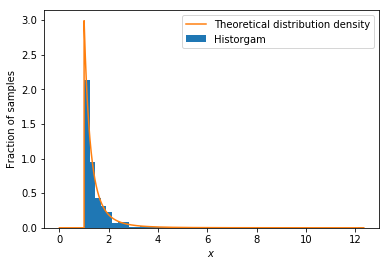

In [4]:
plt.hist(sample, bins = 50, normed=True, label='Historgam')
plt.plot(x, pdf, label = 'Theoretical distribution density')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

Теоретические оценки параметров нормальных распределений, аппроксимирующих выборочные средние при различных n:

Среднее распределения Парето. Математическое ожидание $EX=\frac{x_m\cdot k}{k-1}=1$

Дисперсия распределения Парето $DX=(\frac{x_m}{k-1})^2\frac{k}{k-2}$ при $k>2$

Для выборки объема n получится нормальное распределение $N(EX, \frac{DX}{n})$

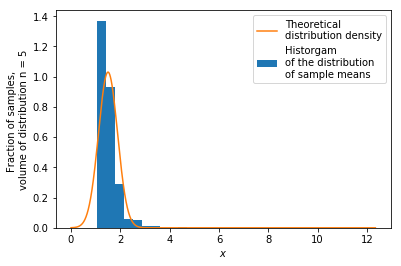

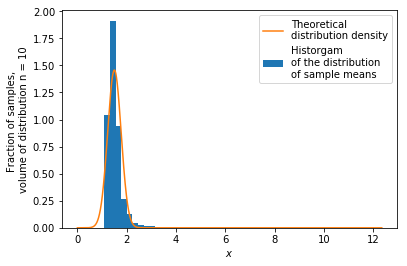

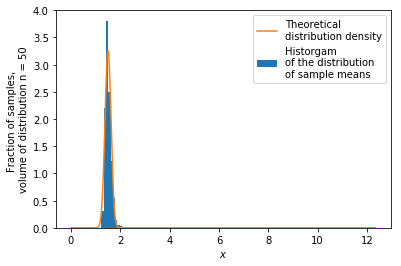

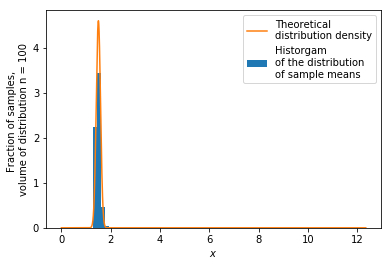

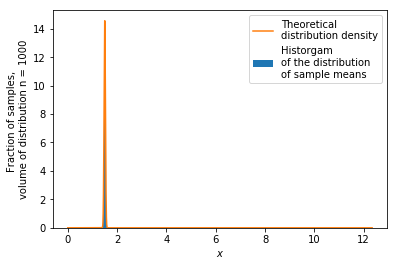

In [5]:
n_all=[5, 10, 50, 100, 1000] #объемы выборок
sigmaP = (float(xm)/(k-1))**2*float(k)/(k-2) #Дисперсия распеределения Парето
for n in n_all: #перебираем интересующие объемы воборок
    average = []
    for i in np.arange(1000): #генерим 1000 выборок объема n
        sample = Pareto_rv.rvs(n)
        average.append(sum(sample)/n) #добавляем значение среднего по выборке в массив средних значений в выборках объема n
    plt.figure(n) #для отображения графиков средних в выборках данного объема создается отдельный график
    plt.hist(average, bins=10, normed=True, label='Historgam \nof the distribution \nof sample means') #изображаем на графике гистограмму распределеней выборочных средних
    plt.xlabel('$x$')
    plt.ylabel('Fraction of samples, \nvolume of distribution n = ' + str(n))
    #генерим нормальное распределение, описывающее теоретически распределение средних в выборке объема n
    #агрументы функции: мат.ожидание EX и стандартное отклонение = sqrt(DX/n)
    norm_rv_n= sts.norm(float(xm)*k/(k-1), np.sqrt(sigmaP/n))
    pdf_n = norm_rv_n.pdf(x) #теоретическая плотность распределения средних значений
    plt.plot(x, pdf_n, label = 'Theoretical \ndistribution density') #добавляем на график теоретическую оценку плотности вероятности выборочных средних
    plt.legend()

Вывод: При малых объемах выборки (при малых n) гистограмма распределения средных не симметричная, при больших n оно становится симметричным. При малых n теоретическая оценка распределения средних значений с помощью нормального распределения плохо аппроксимирует гистограмму средних значений, при больших - теоретическая оценка хорошо соответствует гистограмме. Значит, точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.